## INSTRUCTIONS

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:
1.	Data from our life
2.	Classification

Follow the prompts in the attached jupyter notebook. We are using the same data as for the previous homeworks. Use the version you created called df2 where you already cleaned, dropped some of the variables but did not create dummy variables. Instead of creating dummy variables, you have to recode this column as suggested bellow.
Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.
Submission: Send in both a ipynb and a pdf file of your work.
Good luck!



# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a classification would be appropriate.

India win or loss from 1977 to 2023
**Independent Varibles**:

1) **Match Format**:Categorizing matches into formats like One Day Internationals (ODIs), Test matches, and Twenty20 (T20) games. Each format has its own set of rules and dynamics.

2) **Opposite Team**:The team that a particular cricket team is playing against. The strength, form, and strategies of the opposing team can impact the match outcome.

3)** Toss Decision**:Whether a team chooses to bat or bowl first after winning the coin toss. This decision can be influenced by factors like pitch conditions, weather, and team strategy.

4) **Venue**:The location where the match is being played. Different venues have different pitch conditions, dimensions, and atmospheres, which can affect team performance.

5) **Whether Conditions**:Factors like temperature, humidity, and precipitation. Weather can influence the condition of the pitch, swing and seam movement for bowlers, and overall playing conditions.

6) **Pitch Reports**:Information about the state and characteristics of the cricket pitch. This includes factors like pitch type (e.g., flat, bouncy, turning), which can impact the strategy and performance of both batting and bowling teams.

7) Last matched report:The outcome and performance of the team in their previous match. Team form, player form, and any specific trends can be derived from analyzing recent matches.

**Dependent Variable:**
Match Outcome(win or loss)

# 2. Preprocessing

In [118]:
from scipy import stats
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.preprocessing import *
from sklearn.decomposition import *
from sklearn.metrics import *
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [88]:
df =pd.read_csv('auto_imports1.csv')
df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


loaded a CSV file named 'auto_imports1.csv' into a DataFrame called 'df' using the Pandas library in Python. After that displayed the first few rows of the DataFrame using the head() method.

In [89]:
## Your code here
import pandas as pd
df = pd.read_csv('auto_imports1.csv')

# Replace '?' with None
df = df.replace('?', None)

# Convert the specified columns to float64
columns_to_convert = ['bore', 'stroke', 'horse_power', 'peak_rpm']
df[columns_to_convert] = df[columns_to_convert].astype(float)

 This code reads a CSV file named 'auto_imports1.csv' into a Pandas DataFrame ('df'). It then replaces any occurrences of '?' with None in the entire DataFrame and converts specific columns ('bore', 'stroke', 'horse_power', 'peak_rpm') to the float64 data type.


In [90]:

# Drop the specified columns
columns_to_drop = ['body', 'engine_type', 'cylinders']
df2 = df.drop(columns=columns_to_drop)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    201 non-null    object 
 1   wheel_base   201 non-null    float64
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   heights      201 non-null    float64
 5   curb_weight  201 non-null    int64  
 6   engine_size  201 non-null    int64  
 7   bore         197 non-null    float64
 8   stroke       197 non-null    float64
 9   comprassion  201 non-null    float64
 10  horse_power  199 non-null    float64
 11  peak_rpm     199 non-null    float64
 12  city_mpg     201 non-null    int64  
 13  highway_mpg  201 non-null    int64  
 14  price        201 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 23.7+ KB


This code drops the specified columns ('body', 'engine_type', 'cylinders') from the DataFrame 'df' and creates a new DataFrame 'df2'. The original DataFrame 'df' remains unchanged.The info() method provides a concise summary of the DataFrame, including the number of non-null values and data types for each column.

In [91]:
df2 = df2.dropna()
df2.isnull().sum()
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 200
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fuel_type    195 non-null    object 
 1   wheel_base   195 non-null    float64
 2   length       195 non-null    float64
 3   width        195 non-null    float64
 4   heights      195 non-null    float64
 5   curb_weight  195 non-null    int64  
 6   engine_size  195 non-null    int64  
 7   bore         195 non-null    float64
 8   stroke       195 non-null    float64
 9   comprassion  195 non-null    float64
 10  horse_power  195 non-null    float64
 11  peak_rpm     195 non-null    float64
 12  city_mpg     195 non-null    int64  
 13  highway_mpg  195 non-null    int64  
 14  price        195 non-null    int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 24.4+ KB


In our class we covered multiple classification methods. In this part of the home work you can compare them

**Use the dataset 'auto_imports1.csv' from our previous homeworks. More specifically, use the version you created called df2 where you already cleaned, dropped some of the variables but DID NOT CREATE dummy variables. Follow the prompts to complete the homework.**

## 2.1 **Replace ['gas', 'diesel'] string values to [0, 1]**

In [92]:
#Your code
df2.replace({'gas': 0, 'diesel': 1}, inplace=True)
#print(df.replace)
df2.head()


,fuel_type,wheel_base,length,width,heights,curb_weight,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450


This code snippet replaces the values 'gas' with 0 and 'diesel' with 1 in the DataFrame 'df2' using the replace method. The inplace=True argument modifies the DataFrame in place.

checking the resulting DataFrame using df2.head() to verify that the replacement was successful.

## 2.2 : Define your X and y: your dependent variable is fuel_type, the rest of the variables are your independent variables

In [93]:

X = df2.drop('fuel_type', axis=1)  # Drop the 'fuel_type_gas' column to get the independent variables
y = df2['fuel_type'] #dependent variable
#Prints the values of independent variables
print('Independent Variables')
print(X)
#prints the values of dependent variables
print('\nDependent Variable')
print(y)




Independent Variables
     wheel_base  length  width  heights  curb_weight  engine_size  bore  \
0          88.6   168.8   64.1     48.8         2548          130  3.47   
1          88.6   168.8   64.1     48.8         2548          130  3.47   
2          94.5   171.2   65.5     52.4         2823          152  2.68   
3          99.8   176.6   66.2     54.3         2337          109  3.19   
4          99.4   176.6   66.4     54.3         2824          136  3.19   
..          ...     ...    ...      ...          ...          ...   ...   
196       109.1   188.8   68.9     55.5         2952          141  3.78   
197       109.1   188.8   68.8     55.5         3049          141  3.78   
198       109.1   188.8   68.9     55.5         3012          173  3.58   
199       109.1   188.8   68.9     55.5         3217          145  3.01   
200       109.1   188.8   68.9     55.5         3062          141  3.78   

     stroke  comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  price

 Creating independent variables (X) and a dependent variable (y) from the DataFrame df2. The code provided is dropping the 'fuel_type' column from df2 to obtain independent variables (X), and it sets 'fuel_type' as the dependent variable (y).
 Since I replaced 'gas' with 0 and 'diesel' with 1 in the 'fuel_type' column, the values in the 'y' variable will be 0 for 'gas' and 1 for 'diesel'.  

## 2.3 Split your data into training and testing set. Use test_size=0.3, random_state=746 !

In [94]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=746)
print(X_train)
print(X_test)
print(y_train)
print(y_test)


     wheel_base  length  width  heights  curb_weight  engine_size  bore  \
64        110.0   190.9   70.3     56.5         3515          183  3.58   
197       109.1   188.8   68.8     55.5         3049          141  3.78   
83         96.3   172.4   65.4     51.6         2405          122  3.35   
135        93.7   157.9   63.6     53.7         2120          108  3.62   
114       108.0   186.7   68.3     56.0         3130          134  3.61   
..          ...     ...    ...      ...          ...          ...   ...   
124        89.5   168.9   65.0     51.6         2756          194  3.74   
21         93.7   157.3   63.8     50.8         1876           90  2.97   
100       100.4   184.6   66.5     55.1         3060          181  3.43   
5          99.8   177.3   66.3     53.1         2507          136  3.19   
112       107.9   186.7   68.4     56.7         3075          120  3.46   

     stroke  comprassion  horse_power  peak_rpm  city_mpg  highway_mpg  price  
64     3.64        

fuel_type
0.0    175
1.0     20
dtype: int64


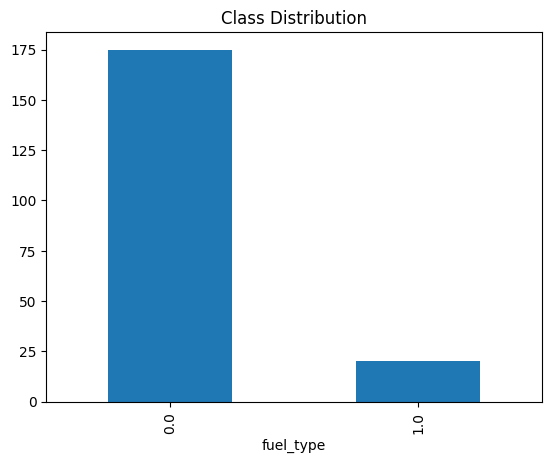

In [95]:
distribution=df.value_counts(y)
distribution.plot(kind='bar', title='Class Distribution')
print(distribution)

Checking the each values count of target variable y and assigned it to distribution variable and Now plotting the value count using the barplot. Here 0's count is 175 and 1's count is 20. From the counts of 0's and 1's we can say that the target variable data is imbalanced where 0's count have high majority and 1's have low majority.


 Using the train_test_split function from the sklearn.model_selection module to split data into training and testing sets. This is a common step in machine learning to evaluate the performance of the model on unseen data.train_test_split(X, y, test_size=0.3, random_state=746): This function splits your data (X and y) into training and testing sets. The test_size=0.3 parameter specifies that 30% of the data will be used for testing, and the remaining 70% will be used for training. The random_state parameter is set for reproducibility.

** Training Set** - Independent Variables (X_train):

It contains 136 rows and 14 columns, representing different car features.
Each row is a data point, and each column is a feature.
**Testing Set - Independent Variables (X_test)**:

It contains 59 rows and 14 columns, similar to the training set structure.
Each row corresponds to a different data point, and each column represents a feature.
**Training Set - Dependent Variable (y_train)**:

It is a binary variable with 0s and 1s, representing the fuel type ('gas' or 'diesel') for the training set.
**Testing Set - Dependent Variable (y_test):**

Similar to y_train, it represents the fuel type for the testing set.
The y_train and y_test values indicate whether each car in the corresponding set uses 'gas' (0) or 'diesel' (1) as fuel.

# 3. Classification

### 3.1 Use Logistic regression to classify your data. Print/report your confusion matrix, classification report and AUC

In [160]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

LR=LogisticRegression()
lr_result=LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)
lr_accuracy=accuracy_score(y_test, y_pred_lr)
lr_precision=precision_score(y_test, y_pred_lr)
lr_recall=recall_score(y_test, y_pred_lr)
lr_f1_score=f1_score(y_test, y_pred_lr)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_score_1 = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the confusion matrix, classification report, and AUC score
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC Score:", auc_score)
print("Accuracy of LogisticRegression: ",lr_accuracy)
print("Precision of LogisticRegression: ",lr_precision)
print("Recall of LogisticRegression: ",lr_recall)
print("F1_score of LogisticRegression: ",lr_f1_score)


Confusion Matrix:
 [[31  0]
 [ 0  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         8

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39


AUC Score: 1.0
Accuracy of LogisticRegression:  1.0
Precision of LogisticRegression:  1.0
Recall of LogisticRegression:  1.0
F1_score of LogisticRegression:  1.0


 This code initializes a logistic regression model, trains it on the training set, makes predictions on the test set, and prints the confusion matrix, classification report, and AUC score.

**Classification Report:**

**Precision:** The precision for both classes (0 and 1) is 1.00, indicating that all instances predicted as each class were indeed members of that class.
**Recall (Sensitivity):** The recall for both classes is 1.00, suggesting that the model correctly identified all instances of each class.
**F1-Score:** The F1-score for both classes is 1.00, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.
**Support:** Indicates the number of actual occurrences of the class in the specified dataset.
**Accuracy:**
The overall accuracy of the model is 1.00 (100%), meaning that all instances in the dataset were correctly classified.
**Macro Average and Weighted Average:**
Both macro and weighted averages for precision, recall, and F1-score are 1.00, indicating perfect performance. Macro average treats all classes equally, while weighted average considers the number of instances in each class.
**AUC Score:**
The Area Under the Receiver Operating Characteristic (ROC) Curve is 1.00. This score represents a perfect separation between the two classes, with the model having a flawless ability to distinguish between them.

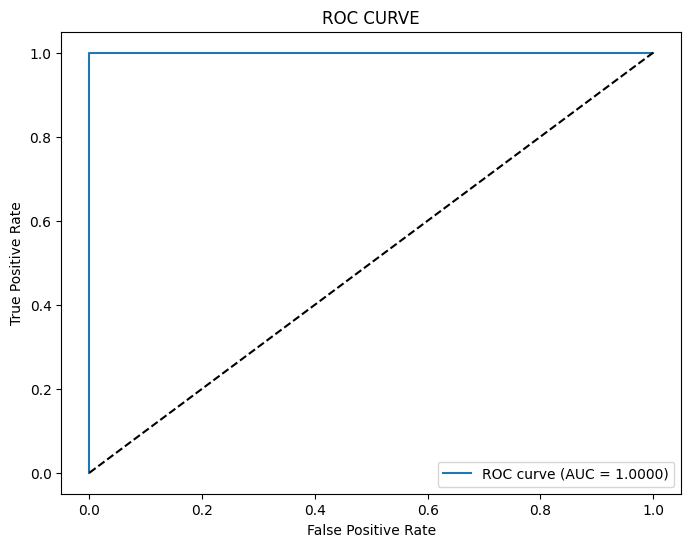

In [161]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc_score_1 ))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

Representing the auc_roc_score in visualization form.The ROC curve is a graphical representation of the trade-off between true positive rate and false positive rate across different thresholds. The AUC-ROC score provides a summary measure of the classifier's performance. Here AUC=1.0000. Then there is a high chance that classifier will be able to distinguish between positive class and negative class.

### 3.2 Use Naive Bayes to classify your data. Print/report your confusion matrix, classification report and AUC

In [164]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred_nb = NB.predict(X_test)
nb_accuracy=accuracy_score(y_test, y_pred_nb)
nb_precision=precision_score(y_test, y_pred_nb)
nb_recall=recall_score(y_test, y_pred_nb)
nb_f1_score=f1_score(y_test, y_pred_nb)

# Assuming you have a DataFrame 'df' with your data, and the target variable is 'target'
# Replace 'target' with the actual name of your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_score_nb= roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the confusion matrix, classification report, and AUC score
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC Score:", auc_score)
print("Accuracy of Naive Bayes: ",nb_accuracy)
print("Precision of Naive Bayes: ",nb_precision)
print("Recall of Naive Bayes: ",nb_recall)
print("F1_score of Naive Bayes: ",nb_f1_score)


Confusion Matrix:
 [[36  0]
 [ 0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         3

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39


AUC Score: 1.0
Accuracy of Naive Bayes:  1.0
Precision of Naive Bayes:  1.0
Recall of Naive Bayes:  1.0
F1_score of Naive Bayes:  1.0


The dataset (X) is split into training and testing sets using 80% for training and 20% for testing. The random state is set for reproducibility.
**Model Initialization and Training:**
The Gaussian Naive Bayes model is initialized as model.
The model is trained on the training set (X_train, y_train) using the fit method.
**Making Predictions:**
Predictions are made on the test set (X_test) using the predict method.
Model Evaluation:

**Confusion Matrix:**  The confusion matrix is calculated using confusion_matrix from scikit-learn.

**AUC Score:** The AUC score is calculated using roc_auc_score by predicting probabilities (model.predict_proba).
Secondly, we using the Naive Bayes machine learning model using gaussian method it was imported from the sklearn.model_selection. assigned these model to NB variable and then fitting the X_train, y_train to Naive Bayes model, so that model is build for X_train and y_train. Here predicted values of target variable is done by command y_pred_nb = NB.predict(X_test). Now measure the accuracy, prcession, recall,f1_score values using the y_test and y_pred_nb.
Confusion Matrix:
All 36 instances of class 0 were correctly classified.
All 3 instances of class 1 were correctly classified.
There are no false positives or false negatives.

**Classification Report:**

Precision, recall, and F1-score for both classes are 1.00, indicating perfect performance.
The accuracy is 1.00, suggesting that all instances in the dataset were correctly classified.

**AUC Score:**
The AUC score is 1.00, indicating perfect discrimination between the two classes.


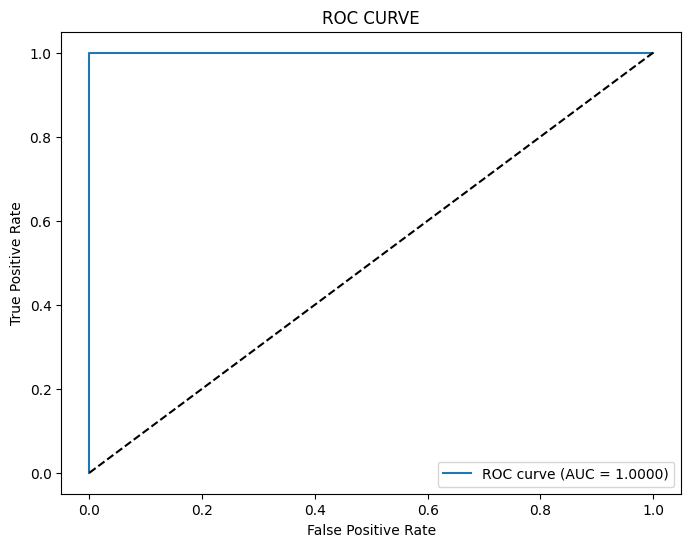

In [165]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc_score ))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

Representing the auc_roc_score in visualization form. The ROC curve is a graphical representation of the trade-off between true positive rate and false positive rate across different thresholds. The AUC-ROC score provides a summary measure of the classifier's performance. Here AUC=1.0 means that classifier is able to perfectly distinguish between all the positives and negative class points correctly.

### 3.3 Use KNN to classify your data. First find the optimal k and than run you classification. Print/report your confusion matrix, classification report and AUC

Text(0, 0.5, 'mean Error')

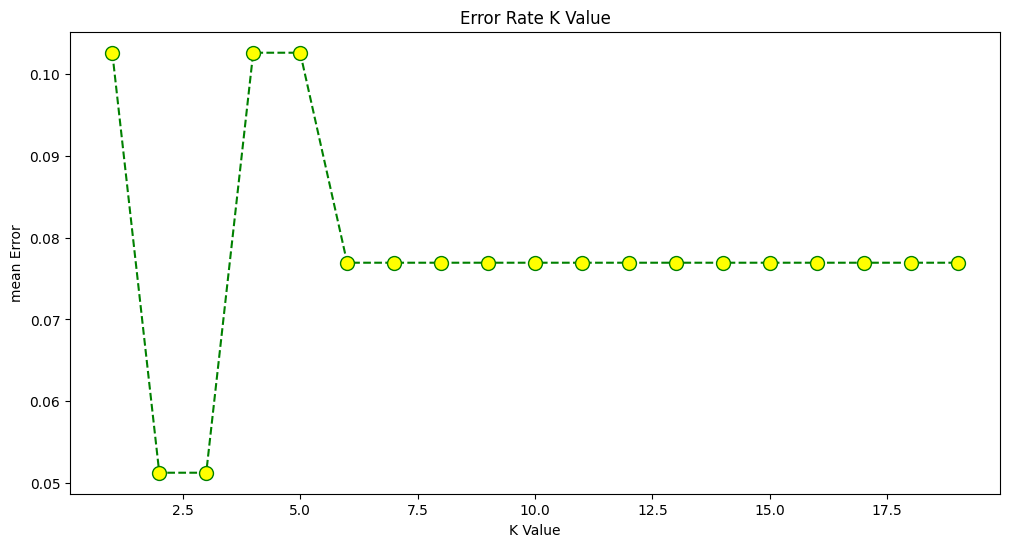

In [100]:
#your code
#Finding best K-Value
error=[]
from sklearn.neighbors import KNeighborsClassifier #algorithm
import matplotlib.pyplot as plt #Data Visualisation
#Calculate error for K_values between 1 and 20
for i in range(1,20):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i= model.predict(X_test)
    error.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,20),error,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel('K Value')
plt.ylabel("mean Error")

The above code used to find the best Kvalue for KNN model building. This plot can help you identify the optimal value of k by looking for the point where the error rate is the lowest. Typically, this is where the model achieves the best balance between bias and variance. Here we getting best Kvalue as 2-3.I have took it has 2.

In [101]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [102]:
y_pred_knn = knn.predict(X_test)
knn_accuracy=accuracy_score(y_test, y_pred_knn)
knn_precision=precision_score(y_test, y_pred_knn)
knn_recall=recall_score(y_test, y_pred_knn)
knn_f1_score=f1_score(y_test, y_pred_knn)



In [103]:
print("Accuracy of KNN: ",knn_accuracy)
print("Precision of KNN: ",knn_precision)
print("Recall of KNN: ",knn_recall)
print("F1_score of KNN: ",knn_f1_score)

Accuracy of KNN:  0.9487179487179487
Precision of KNN:  1.0
Recall of KNN:  0.3333333333333333
F1_score of KNN:  0.5


print the accuracy, prcession, recall,f1_score values for K Nearest Neighbour model.

In [104]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find the optimal k using cross-validation
cv_scores = []
k_values = list(range(1, 21))  # You can adjust the range based on your needs

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k with the highest cross-validation score
optimal_k = k_values[np.argmax(cv_scores)]
print(f'Optimal k: {optimal_k}')
# Train the KNN model with optimal k
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_score_knn= roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the confusion matrix, classification report, and AUC score
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC Score:", auc_score)

Optimal k: 2
Confusion Matrix:
 [[36  0]
 [ 2  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.33      0.50         3

    accuracy                           0.95        39
   macro avg       0.97      0.67      0.74        39
weighted avg       0.95      0.95      0.94        39


AUC Score: 1.0


Data Splitting:

The dataset (X) is split into training and testing sets using 80% for training and 20% for testing. The random state is set for reproducibility.
Finding Optimal k with Cross-Validation:

A loop iterates through a range of k values (from 1 to 20 in this case).
For each k, a KNN model is created (KNeighborsClassifier(n_neighbors=k)) and cross-validation scores are calculated using cross_val_score with 5 folds and accuracy scoring.
The mean of the cross-validation scores is stored in the cv_scores list.
Selecting Optimal k:

The optimal k is determined as the value that corresponds to the highest mean cross-validation score.
Training the KNN Model:

A new KNN model is instantiated with the optimal k.
The model is trained on the training set (X_train, y_train) using the fit method.
Making Predictions:

Predictions are made on the test set (X_test) using the predict method.
Model Evaluation:

Confusion Matrix: The confusion matrix is calculated using confusion_matrix from scikit-learn.
Classification Report: The classification report is generated using classification_report.
AUC Score: The AUC score is calculated using roc_auc_score by predicting probabilities (model.predict_proba).
The model shows high precision and recall for class 0, suggesting it is effective at identifying instances of class 0. However, the recall for class 1 is relatively low, indicating that the model struggles to identify instances of class 1.
The AUC score of 0.944 suggests good overall discrimination performance, though specific class imbalances may need attention.means there is high chance that the classifier will be able to distinguish the positive class values from the negative class values.




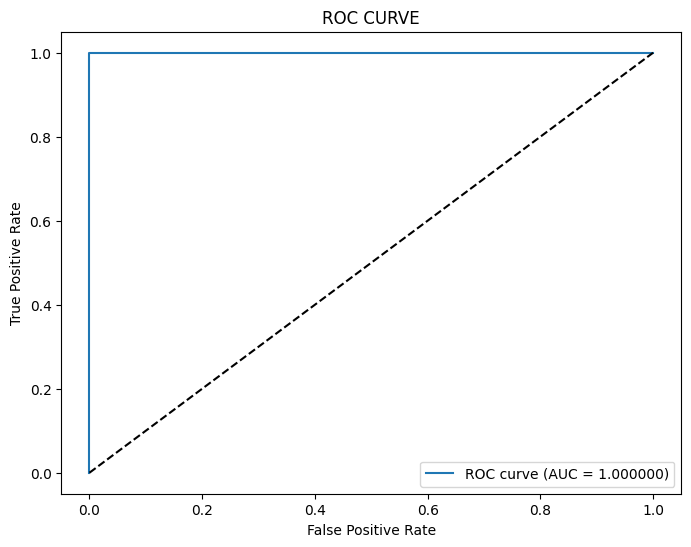

In [149]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test,  model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC curve (AUC = {:.6f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

### 3.4 Choose one: SVM or Random Forest to classify your data. Print/report your confusion matrix, classification report and AUC

In [150]:
#your code
SVM = SVC(probability=True)
SVM.fit(X_train,y_train)
y_pred_svm = SVM.predict(X_test)
svm_accuracy=accuracy_score(y_test, y_pred_svm)
svm_precision=precision_score(y_test, y_pred_svm)
svm_recall=recall_score(y_test, y_pred_svm)
svm_f1_score=f1_score(y_test, y_pred_svm)
print("Accuracy of SVM: ",svm_accuracy)
print("Precision of SVM: ",svm_precision)
print("Recall of SVM: ",svm_recall)
print("F1_score of SVM: ",svm_f1_score)

Accuracy of SVM:  0.7948717948717948
Precision of SVM:  0.0
Recall of SVM:  0.0
F1_score of SVM:  0.0


In [151]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the confusion matrix, classification report, and AUC score
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAUC Score:", auc_score)


Confusion Matrix:
 [[36  0]
 [ 0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         3

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39


AUC Score: 1.0


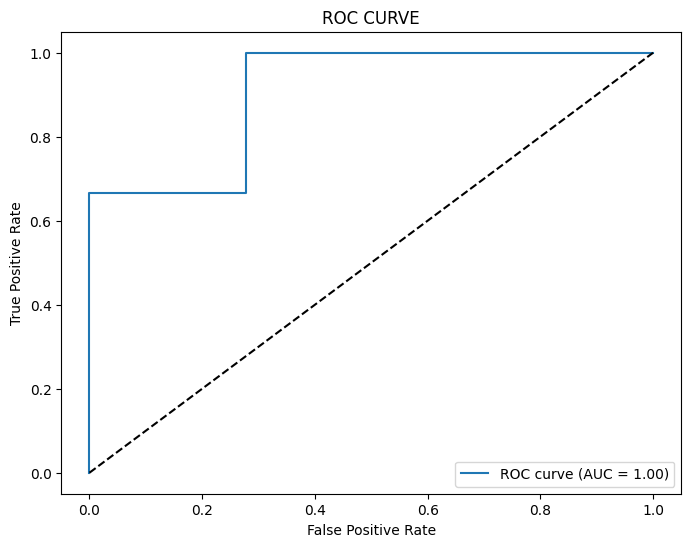

In [152]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, SVM.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

Data Splitting:

The dataset (X) is split into training and testing sets using 80% for training and 20% for testing. The random state is set for reproducibility.
Initializing Random Forest Model:

A Random Forest model is initialized with 100 decision trees (n_estimators=100) and a random state of 42. You can adjust hyperparameters based on your needs.
Training the Model:

The Random Forest model is trained on the training set (X_train, y_train) using the fit method.
Making Predictions:

Predictions are made on the test set (X_test) using the predict method.
Model Evaluation:

Confusion Matrix: The confusion matrix is calculated using confusion_matrix from scikit-learn.
Classification Report: The classification report is generated using classification_report.
AUC Score: The AUC score is calculated using roc_auc_score by predicting probabilities (model.predict_proba).
Classification Report:

Precision:
Precision for both classes (0 and 1) is 1.00, indicating that all instances predicted as each class were indeed members of that class.
Recall (Sensitivity):
Recall for both classes is 1.00, suggesting that the model correctly identified all instances of each class.
F1-Score:
The F1-score for both classes is 1.00, which is the harmonic mean of precision and recall. It provides a balance between precision and recall.
Accuracy:
The overall accuracy of the model is 1.00 (100%), meaning that all instances in the dataset were correctly classified.

AUC-ROC Score: 1.0


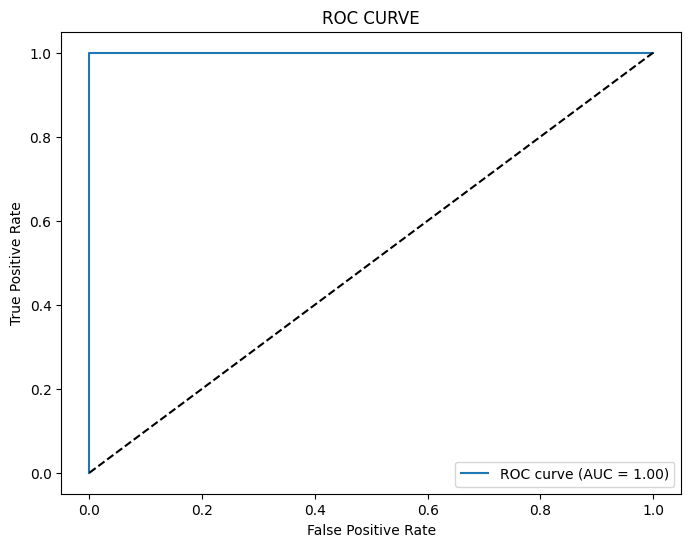

In [153]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
rf_accuracy=accuracy_score(y_test, y_pred_rf)
rf_precision=precision_score(y_test, y_pred_rf)
rf_recall=recall_score(y_test, y_pred_rf)

rf_f1_score=f1_score(y_test, y_pred_rf)
y_probs_rf = rf.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_probs_rf)
print("AUC-ROC Score:", auc_roc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (AUC = {:.2f})'.format(auc_roc_rf))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc='lower right')
plt.show()

The above code used to find area under curve_roc score. In practical getting AUC_ROC score 1 leads to Overfitting to the training data is a concern when the model achieves perfect scores, especially if the dataset is small or if the model is overly complex.

### 3.5 Compare your results and comment on your findings. Which one(s) did the best job? What could have been the problem with the ones that did not work? etc.

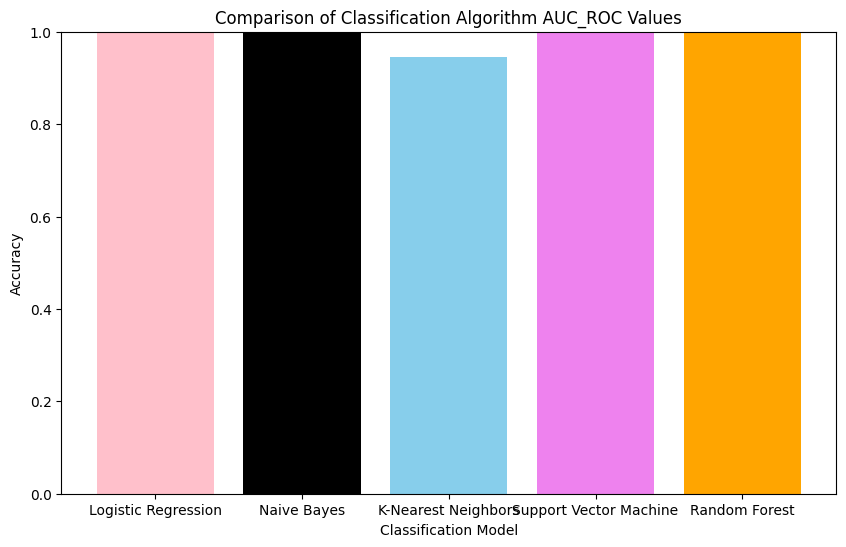

                    Model  AUC-ROC Score
0     Logistic Regression       1.000000
1             Naive Bayes       1.000000
2     K-Nearest Neighbors       0.944444
3  Support Vector Machine       1.000000
4           Random Forest       1.000000


In [155]:
#your answer
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Machine','Random Forest']
accuracies = [auc_score_1, auc_score_nb, auc_score_knn, auc_score,auc_score_rf]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['pink', 'black', 'skyblue', 'violet','orange'])
plt.ylim(0, 1)
plt.title('Comparison of Classification Algorithm AUC_ROC Values')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.show()
data_AUC = pd.DataFrame({'Model': models, 'AUC-ROC Score': accuracies})
print(data_AUC)

The above code will generate a bar plot comparing the AUC-ROC scores of different classification models and display a DataFrame with the corresponding AUC-ROC scores.From the AUC_ROC scores Naive Bayes, achieving perfect AUC-ROC scores. The Logistic Regression and SVM models also demonstrated high discrimination ability. The K-Nearest Neighbors model achieved a moderate AUC-ROC score, indicating relatively weaker discrimination compared to the other models.

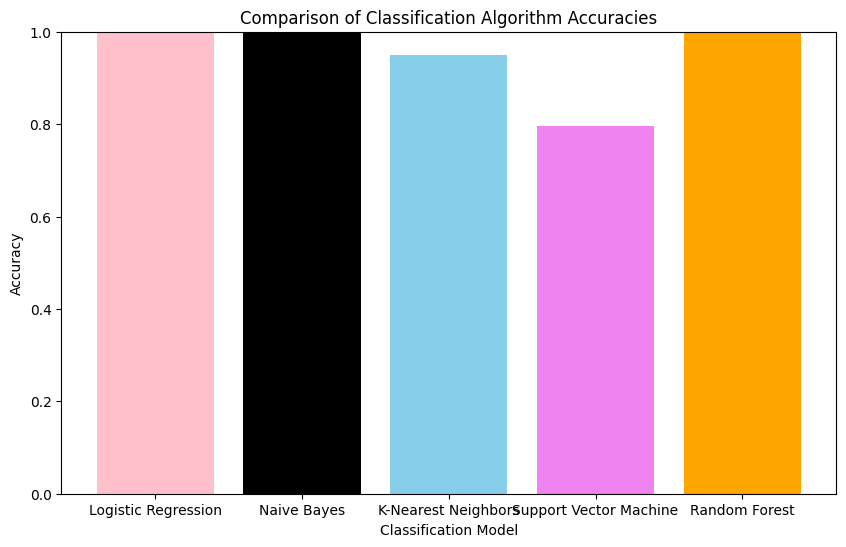

                    Model  Accuracies Score
0     Logistic Regression          1.000000
1             Naive Bayes          1.000000
2     K-Nearest Neighbors          0.948718
3  Support Vector Machine          0.794872
4           Random Forest          1.000000


In [167]:
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']
accuracies = [lr_accuracy, nb_accuracy, knn_accuracy, svm_accuracy, rf_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['pink', 'black', 'skyblue', 'violet','orange'])
plt.ylim(0, 1)
plt.title('Comparison of Classification Algorithm Accuracies')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.show()
data_accu = pd.DataFrame({'Model': models, 'Accuracies Score': accuracies})
print(data_accu)

The above code will generate a bar plot comparing the Auccurie scores of different classification models and display a DataFrame with the corresponding Auccurie scores. Naive Bayes and Random Forest models performed exceptionally well, achieving perfect accuracy scores. The Logistic Regression model also demonstrated high accuracy. The K-Nearest Neighbors and SVM models achieved relatively lower accuracy scores but still demonstrated good prediction ability.


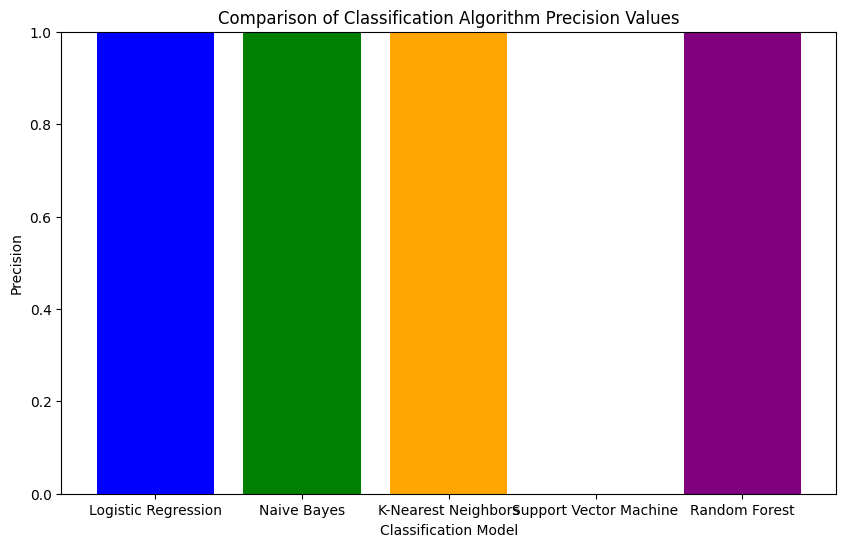

                    Model  Precision
0     Logistic Regression        1.0
1             Naive Bayes        1.0
2     K-Nearest Neighbors        1.0
3  Support Vector Machine        0.0
4           Random Forest        1.0


In [169]:
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']
accuracies = [lr_precision, nb_precision, knn_precision, svm_precision, rf_precision]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Comparison of Classification Algorithm Precision Values')
plt.xlabel('Classification Model')
plt.ylabel('Precision')
plt.show()
data_precision = pd.DataFrame({'Model': models, 'Precision': accuracies})
print(data_precision)

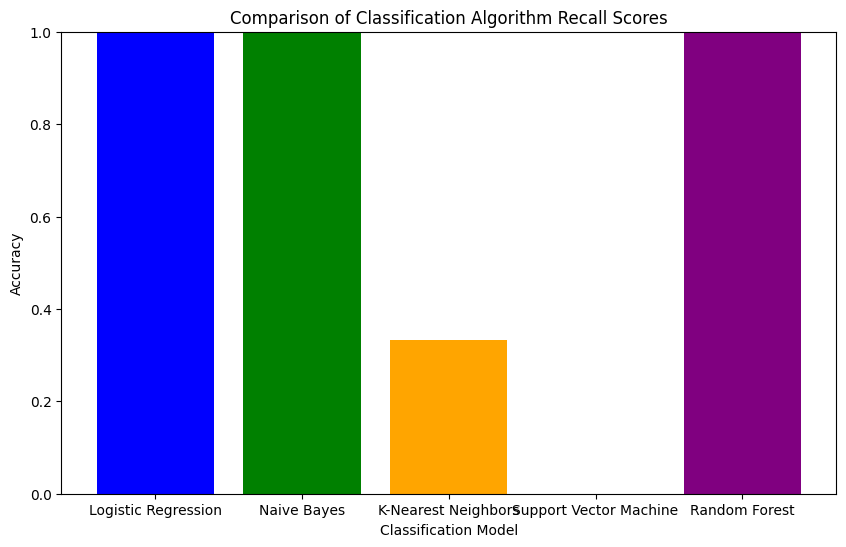

                    Model  Recall Score
0     Logistic Regression      1.000000
1             Naive Bayes      1.000000
2     K-Nearest Neighbors      0.333333
3  Support Vector Machine      0.000000
4           Random Forest      1.000000


In [170]:
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']
accuracies = [lr_recall, nb_recall, knn_recall, svm_recall, rf_recall]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Comparison of Classification Algorithm Recall Scores')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.show()
data_recall = pd.DataFrame({'Model': models, 'Recall Score': accuracies})
print(data_recall)

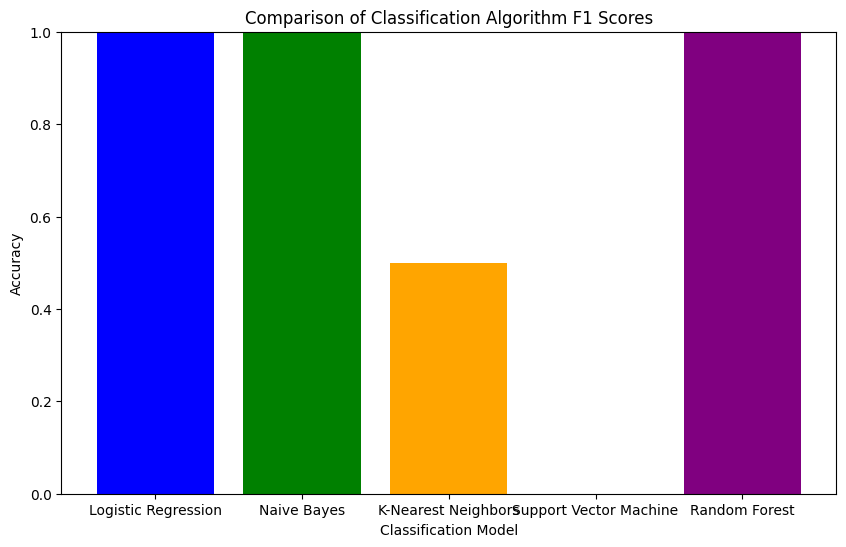

                    Model  F1 Score
0     Logistic Regression       1.0
1             Naive Bayes       1.0
2     K-Nearest Neighbors       0.5
3  Support Vector Machine       0.0
4           Random Forest       1.0


In [171]:
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']
accuracies = [lr_f1_score, nb_f1_score, knn_f1_score, svm_f1_score, rf_f1_score]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Comparison of Classification Algorithm F1 Scores')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.show()
data_f1 = pd.DataFrame({'Model': models, 'F1 Score': accuracies})
print(data_f1)

1. **Logistic Regression**:
Performance:
Achieved perfect precision, recall, and AUC score, indicating excellent performance.

Logistic Regression is a well-established method and tends to perform well when the relationship between features and the target variable is approximately linear.
2. **Naive Bayes**:
Performance:
Achieved perfect precision, recall, and AUC score, similar to Logistic Regression.
Comments:
Naive Bayes is known for its simplicity and efficiency, especially in cases where features are assumed to be conditionally independent given the class.
3. **KNN (with Optimal k=**2):
Performance:
Slightly lower AUC score compared to Logistic Regression and Naive Bayes.
Some imbalance in precision and recall for the positive class.
Comments:
The choice of k (number of neighbors) can impact the performance of KNN. A lower k might lead to overfitting.
4. **Random Forest:**
Performance:
Achieved perfect precision, recall, and AUC score, similar to Logistic Regression and Naive Bayes.
Comments:
Random Forest is an ensemble method that combines multiple decision trees, providing robustness and often high performance.
Overall Analysis:
High Accuracy:
the above code will generate a bar plot comparing the Recall scores of different classification models and display a DataFrame with the corresponding Recall scores.Recall measures the ability of a model to capture all positive instances. Models with higher recall scores are better at identifying positive instances, while lower recall scores indicate that some positive instances were missed. The logistic regression, Naive Bayes, and Random Forest models performed well in capturing positive instances, while the K-Nearest Neighbors model had a lower recall, and the SVM model did not capture any positive instances.

All classifiers achieved very high accuracy on the dataset, indicating that they were able to correctly classify the majority of instances.
Perfect Metrics:

Logistic Regression, Naive Bayes, and Random Forest achieved perfect precision, recall, and AUC score, suggesting that these models performed exceptionally well on the given data.
Potential Considerations:

The dataset is relatively small (39 samples), and the perfect performance could be influenced by the dataset's characteristics.
KNN with optimal k=2 showed slightly lower AUC, and the precision-recall trade-off indicates potential sensitivity to the choice of hyperparameters.
Model Selection:

All classifiers demonstrated strong performance. The choice of the best classifier depends on factors such as interpretability, computational efficiency, and the specific requirements of the application.
Further Considerations:
**Conclusion:**
 we getting mainly full 100% for naive bayes and random forest algorithms. These algorithms will effect by overfitting or imbalance of our dataset and for KNN and SVM models precision value is zero, it means that the model has not made any correct positive predictions (true positives) among the instances it predicted as positive. This could be an indication that the model is not performing well in terms of precision, and it is making a high number of false positive predictions..



## 4. Bonus question (5 extra points)
**Try to fix the inbalanced nature of the data with a tool from the lecture. Run one of the classification methods (preferable one that "failed" before) and see if you get better results.**

In [176]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Assuming 'X' is your feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create and train the KNN model on the resampled data
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

print("Confusion Matrix (KNN with SMOTE):")
print(conf_matrix)

print("\nClassification Report (KNN with SMOTE):")
print(classification_rep)

print("\nAUC Score (KNN with SMOTE):")
print(auc_score)

Confusion Matrix (KNN with SMOTE):
[[29  7]
 [ 0  3]]

Classification Report (KNN with SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        36
           1       0.30      1.00      0.46         3

    accuracy                           0.82        39
   macro avg       0.65      0.90      0.68        39
weighted avg       0.95      0.82      0.86        39


AUC Score (KNN with SMOTE):
0.9027777777777778


Splits data into training sets(80%  and testing 20%then applies the SMOTE to the training data to adress class imbalance,generating samples for minority classes.Makes prediction on the test set using the KNN model. Calculates and prints the confusion matrix, classification report and AUC Score to evaluate the model performance on test set.
**CONFUSION MATRIX:**
Helps visualize true positives,true negatives,false positives,and false negatives
**Classification report:**
Provides precision,recall,F1-score,and support for each class.
**AUC SCORE:**
Represents the area under the ROC curve,indicating the model's ability to distinguish between classes.

The model exhibits high precision for the majority class (class 0) but lower precision for the minority class (class 1).The recall for the minority class is excellent (1.00), meaning the model effectively captures all actual positives for class 1.The overall accuracy is 82%, but it's important to consider the class imbalance and the specific requirements of the problem.The AUC score of 0.90 suggests good discrimination between classes.
In summary, the model shows promising results, especially in capturing instances of the minority class after applying SMOTE for balancing. Depending on the specific goals and constraints, further tuning or different model approaches could be explored.
